In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Sample dataset of points (A, B, C, D, E, F) with 2D coordinates
points = {
    'A': np.array([1, 1]),
    'B': np.array([2, 1]),
    'C': np.array([4, 3]),
    'D': np.array([5, 4]),
    'E': np.array([8, 7]),
    'F': np.array([7, 6])
}

# Convert points to an array for distance calculation
point_names = list(points.keys())
data = np.array(list(points.values()))

# Calculate pairwise distances using Euclidean distance
distance_matrix = squareform(pdist(data, 'euclidean'))

# Helper function to split a cluster into two based on maximum distance
def split_cluster(cluster_indices, distance_matrix):
    # Extract the distances for the current cluster
    cluster_distances = distance_matrix[np.ix_(cluster_indices, cluster_indices)]
    # Find the indices of the two most distant points
    max_dist_indices = np.unravel_index(np.argmax(cluster_distances, axis=None), cluster_distances.shape)

    # Get the two points to split on
    i, j = cluster_indices[max_dist_indices[0]], cluster_indices[max_dist_indices[1]]

    # Split the cluster based on proximity to i or j
    cluster_1 = [index for index in cluster_indices if distance_matrix[index, i] < distance_matrix[index, j]]
    cluster_2 = [index for index in cluster_indices if index not in cluster_1]

    return cluster_1, cluster_2

# Divisive clustering recursive function
def divisive_clustering(cluster_indices, distance_matrix, cluster_structure):
    if len(cluster_indices) <= 1:
        return  # Stop when only one point remains in the cluster

    # Split the current cluster
    cluster_1, cluster_2 = split_cluster(cluster_indices, distance_matrix)

    # Add the split clusters to the structure
    cluster_structure.append([point_names[i] for i in cluster_1])
    cluster_structure.append([point_names[i] for i in cluster_2])

    # Recursively split the clusters
    divisive_clustering(cluster_1, distance_matrix, cluster_structure)
    divisive_clustering(cluster_2, distance_matrix, cluster_structure)

# Perform divisive clustering starting with all points
initial_cluster = list(range(len(points)))  # Indices of all points
cluster_structure = []
divisive_clustering(initial_cluster, distance_matrix, cluster_structure)

# Output the resulting hierarchical structure
print("Divisive Clustering Result:")
for cluster in cluster_structure:
    print(cluster)


Divisive Clustering Result:
['A', 'B', 'C']
['D', 'E', 'F']
['A', 'B']
['C']
['A']
['B']
['D']
['E', 'F']
['E']
['F']


this is dis matrix: [[0.         1.         3.60555128 5.         9.21954446 7.81024968]
 [1.         0.         2.82842712 4.24264069 8.48528137 7.07106781]
 [3.60555128 2.82842712 0.         1.41421356 5.65685425 4.24264069]
 [5.         4.24264069 1.41421356 0.         4.24264069 2.82842712]
 [9.21954446 8.48528137 5.65685425 4.24264069 0.         1.41421356]
 [7.81024968 7.07106781 4.24264069 2.82842712 1.41421356 0.        ]]
cluster strucutre printing  [['A', 'B', 'C'], ['D', 'E', 'F'], ['A', 'B'], ['C'], ['A'], ['B'], ['D'], ['E', 'F'], ['E'], ['F']]
initial cluster  printing  [0, 1, 2, 3, 4, 5]
Divisive Clustering Result:
['A', 'B', 'C']
['D', 'E', 'F']
['A', 'B']
['C']
['A']
['B']
['D']
['E', 'F']
['E']
['F']


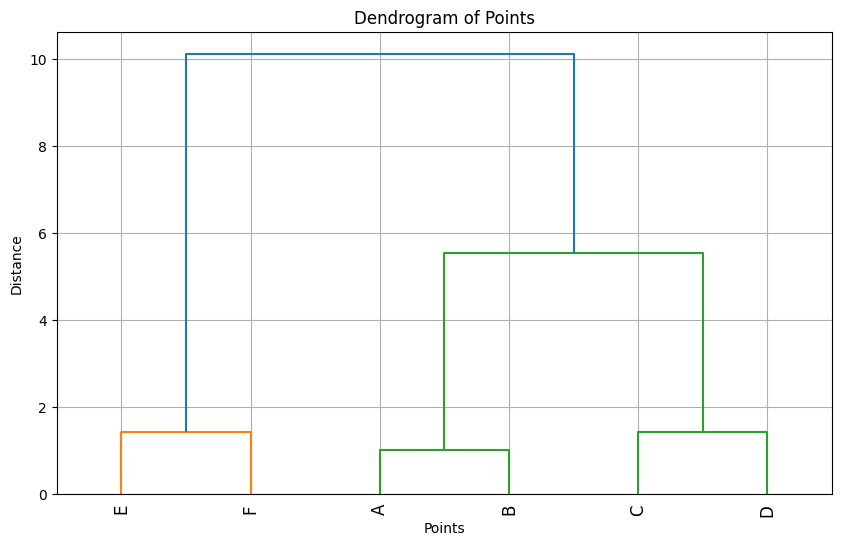

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Sample dataset of points (A, B, C, D, E, F) with 2D coordinates
points = {
    'A': np.array([1, 1]),
    'B': np.array([2, 1]),
    'C': np.array([4, 3]),
    'D': np.array([5, 4]),
    'E': np.array([8, 7]),
    'F': np.array([7, 6])
}

# Convert points to an array for distance calculation
point_names = list(points.keys())
data = np.array(list(points.values()))

# Calculate pairwise distances using Euclidean distance
distance_matrix = squareform(pdist(data, 'euclidean'))
print("this is dis matrix:",distance_matrix)

# Divisive clustering recursive function
def divisive_clustering(cluster_indices, distance_matrix, cluster_structure):
    if len(cluster_indices) <= 1:
        return  # Stop when only one point remains in the cluster

    # Split the current cluster
    cluster_1, cluster_2 = split_cluster(cluster_indices, distance_matrix)

    # Add the split clusters to the structure
    cluster_structure.append([point_names[i] for i in cluster_1])
    cluster_structure.append([point_names[i] for i in cluster_2])

    # Recursively split the clusters
    divisive_clustering(cluster_1, distance_matrix, cluster_structure)
    divisive_clustering(cluster_2, distance_matrix, cluster_structure)

# Perform divisive clustering starting with all points
initial_cluster = list(range(len(points)))  # Indices of all points
cluster_structure = []
divisive_clustering(initial_cluster, distance_matrix, cluster_structure)
print("cluster strucutre printing ",cluster_structure)
print("initial cluster  printing ",initial_cluster)

# Output the resulting hierarchical structure
print("Divisive Clustering Result:")
for cluster in cluster_structure:
    print(cluster)

# Create a dendrogram for visualization
# Use the 'linkage' function to create a hierarchical clustering
Z = linkage(data, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=point_names, leaf_rotation=90)
plt.title('Dendrogram of Points')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.grid()
plt.show()
